In [6]:
import pandas as pd

# Load the two CSV files
csv1 = r"C:\Users\yutik\Downloads\airflow_data.csv"
csv2 = r"C:\Users\yutik\Downloads\airflow_new_data.csv"

data1 = pd.read_csv(csv1)
data2 = pd.read_csv(csv2)

# Ensure both datasets have the same columns
assert set(data1.columns) == set(data2.columns), "Column names do not match."


In [7]:
from scipy.stats import ks_2samp

# Compare distributions of numerical features
numerical_columns = data1.select_dtypes(include=["float64", "int64"]).columns
for column in numerical_columns:
    stat, p_value = ks_2samp(data1[column], data2[column])
    print(f"Feature: {column}, KS Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"--> Drift detected in column '{column}' (p-value < 0.05).")


Feature: ENROLL_AGE, KS Statistic: 0.004134922633757811, p-value: 0.9999999999999932
Feature: ENRLPRKN, KS Statistic: 0.0008925901107030985, p-value: 1.0
Feature: ENRLSRDC, KS Statistic: 0.006262887815013616, p-value: 0.9999990234960519
Feature: ENRLHPSM, KS Statistic: 0.008320089475447658, p-value: 0.9992917664533816
Feature: ENRLRBD, KS Statistic: 0.00012824570556079, p-value: 1.0
Feature: ENRLSNCA, KS Statistic: 0.0002145392542888175, p-value: 1.0
Feature: ENRLGBA, KS Statistic: 0.0016346584124685465, p-value: 1.0
Feature: SEX, KS Statistic: 0.0005016690915060164, p-value: 1.0
Feature: NUPSOURC, KS Statistic: 0.0002983732963348572, p-value: 1.0
Feature: NP1COG, KS Statistic: 0.0020193955291509164, p-value: 1.0
Feature: NP1HALL, KS Statistic: 0.000346930985399244, p-value: 1.0
Feature: NP1DPRS, KS Statistic: 0.0007886583854842446, p-value: 1.0
Feature: NP1ANXS, KS Statistic: 0.0012721271275435515, p-value: 1.0
Feature: NP1APAT, KS Statistic: 0.0009925163536112867, p-value: 1.0
Featur

In [8]:
from scipy.stats import chi2_contingency

# Compare distributions of categorical features
categorical_columns = data1.select_dtypes(include=["object", "category"]).columns
for column in categorical_columns:
    contingency_table = pd.concat(
        [data1[column].value_counts(normalize=True),
         data2[column].value_counts(normalize=True)],
        axis=1,
        keys=["Dataset1", "Dataset2"]
    ).fillna(0)

    stat, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {column}, Chi-square Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"--> Drift detected in column '{column}' (p-value < 0.05).")


In [12]:
import pandas as pd
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# # Load your datasets
# data1 = pd.read_csv("file1.csv")  # Reference dataset
# data2 = pd.read_csv("file2.csv")  # Current dataset

# Create a report using DataDriftPreset
report = Report(metrics=[DataDriftPreset()])
# Run the report
report.run(reference_data=data1, current_data=data2)

# Save the report as an HTML file for visualization
report.save_html("data_drift_report.html")

print("Data drift report saved as 'data_drift_report.html'")


Data drift report saved as 'data_drift_report.html'


In [13]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import TrainTestFeatureDrift

# Create Deepchecks datasets
ds1 = Dataset(data1, label=None)
ds2 = Dataset(data2, label=None)

# Run feature drift check
check = TrainTestFeatureDrift()
result = check.run(ds1, ds2)
result.show()


deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 69 categorical features were inferred.: ENRLPRKN, ENRLHPSM, ENRLRBD, ENRLSNCA, ENRLGBA, SEX, NUPSOURC... For full list use dataset.cat_features
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 69 categorical features were inferred.: ENRLPRKN, ENRLHPSM, ENRLRBD, ENRLSNCA, ENRLGBA, SEX, NUPSOURC... For full list use dataset.cat_features
C:\Users\yutik\AppData\Local\Temp\ipykernel_25164\1778362263.py:9: DeprecationWarning:

The TrainTestFeatureDrift check is deprecated and will be removed in the 0.14 version. Please use the FeatureDrift check inste

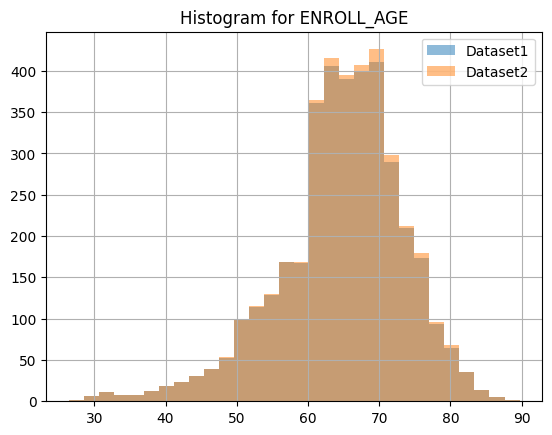

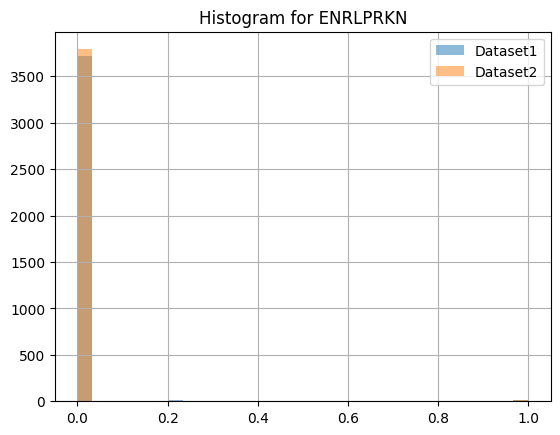

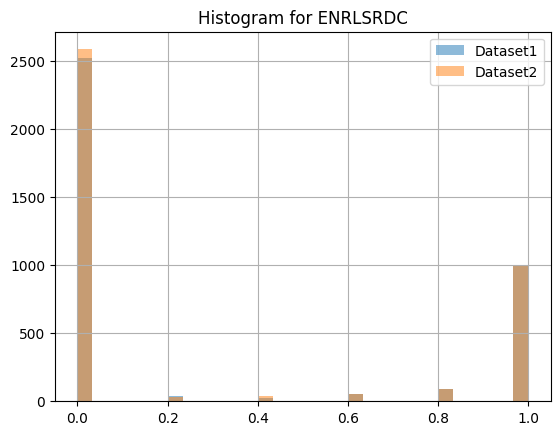

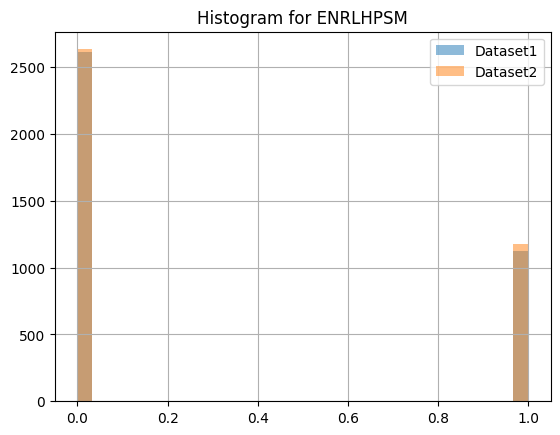

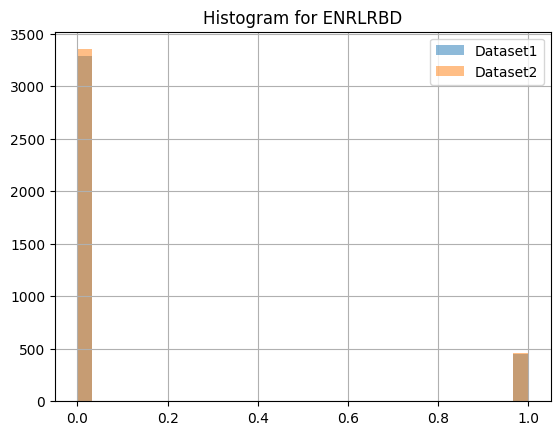

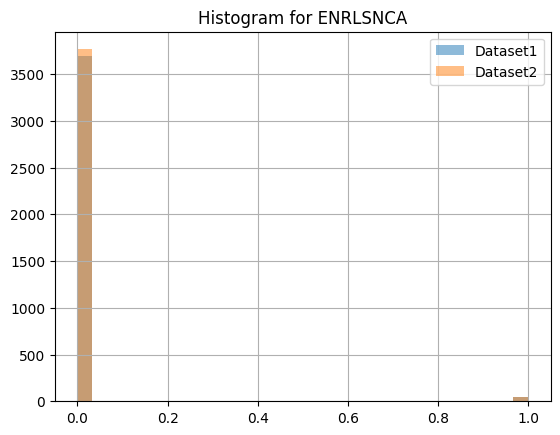

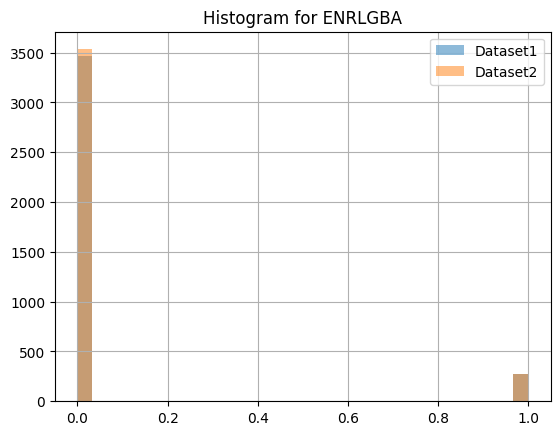

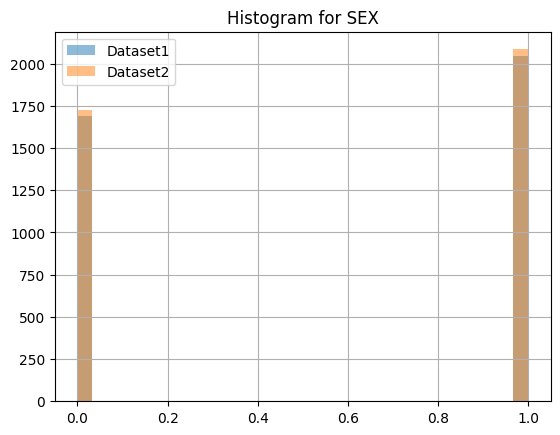

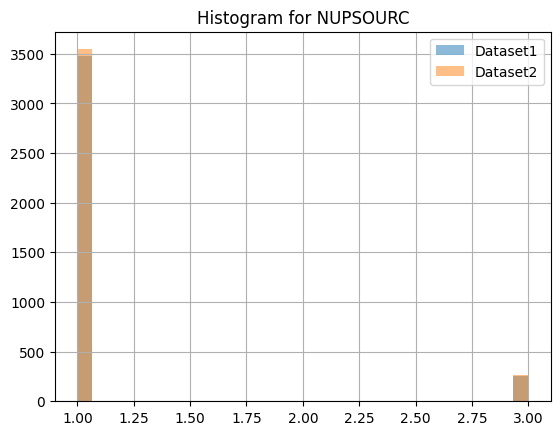

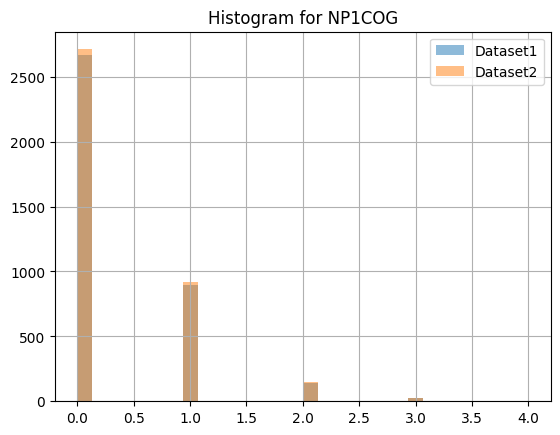

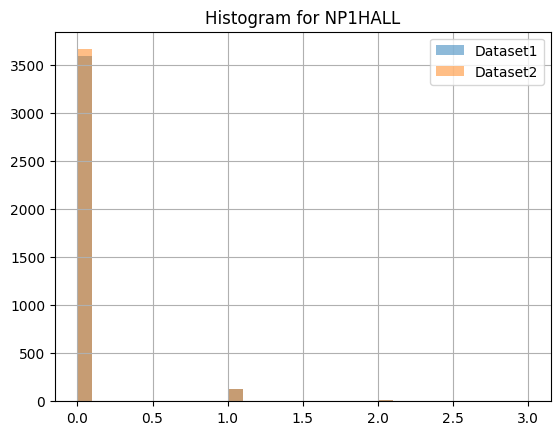

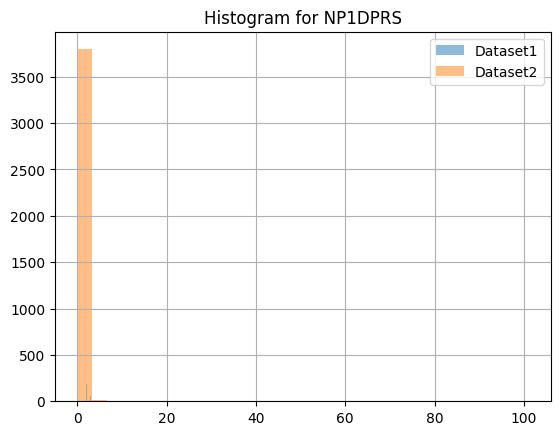

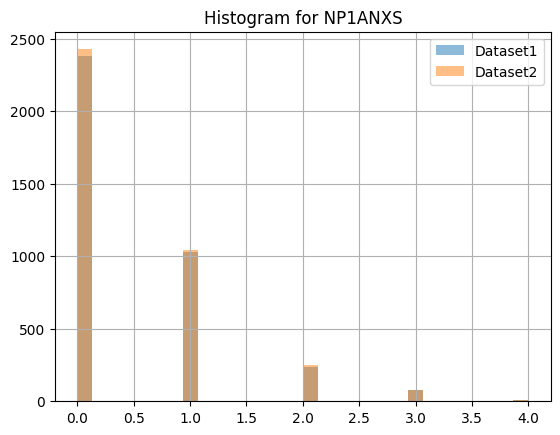

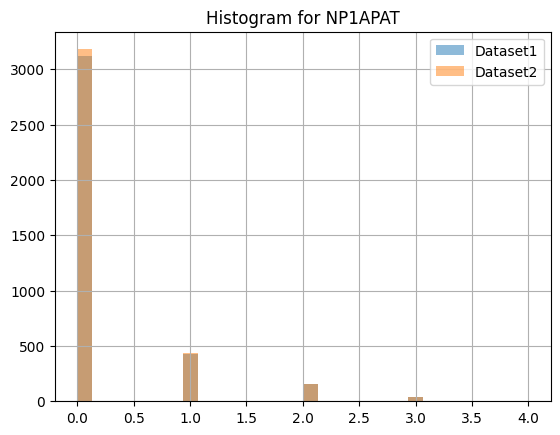

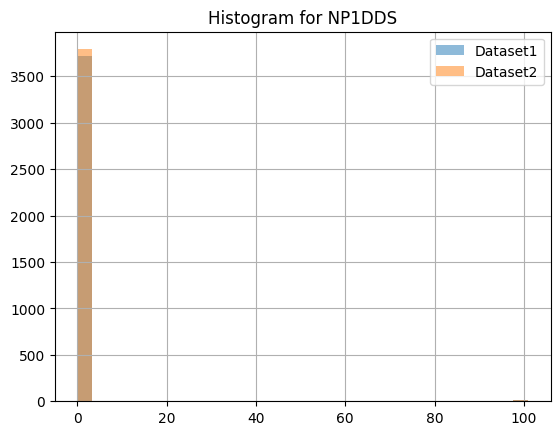

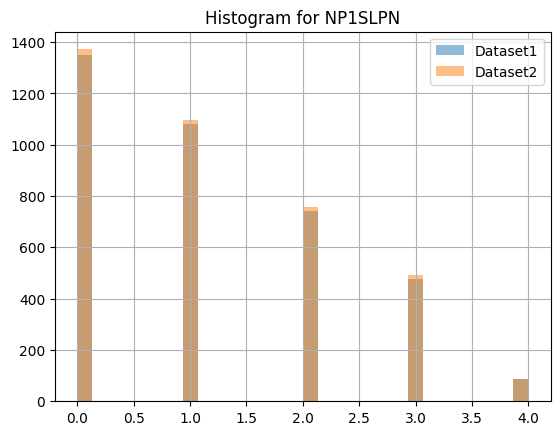

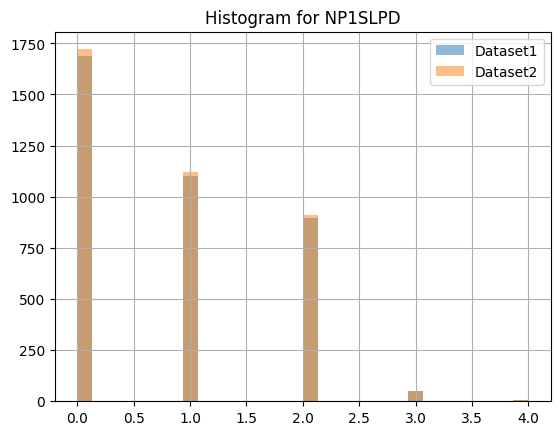

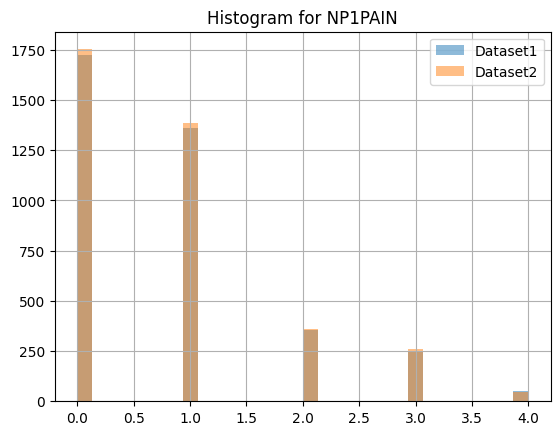

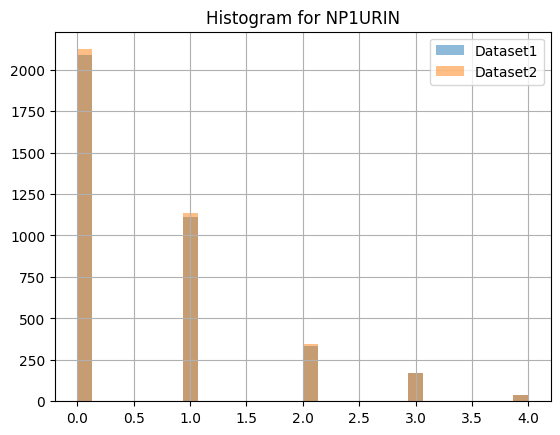

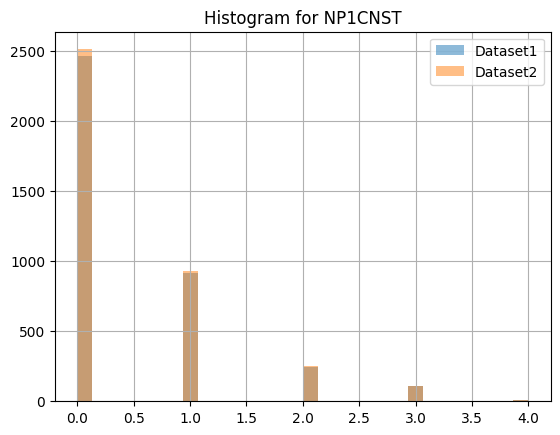

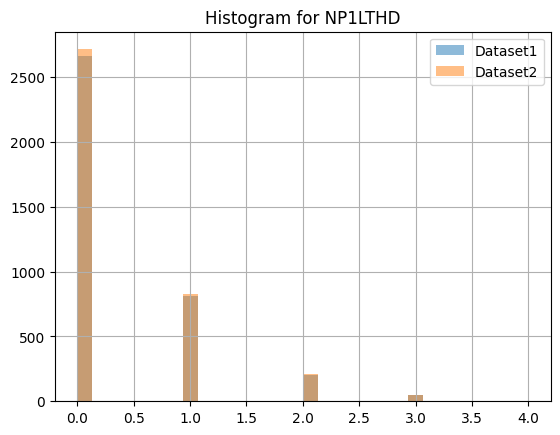

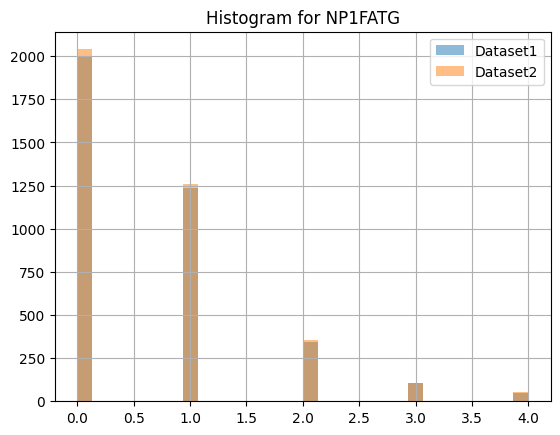

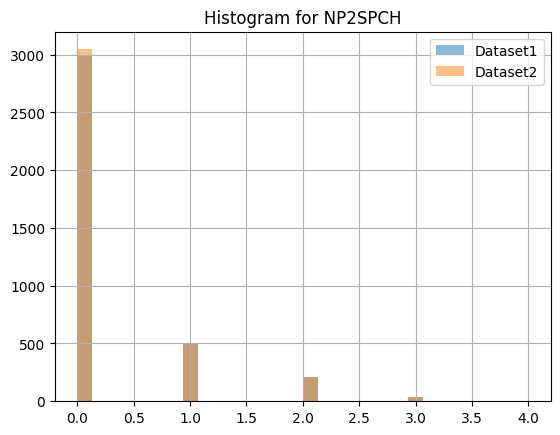

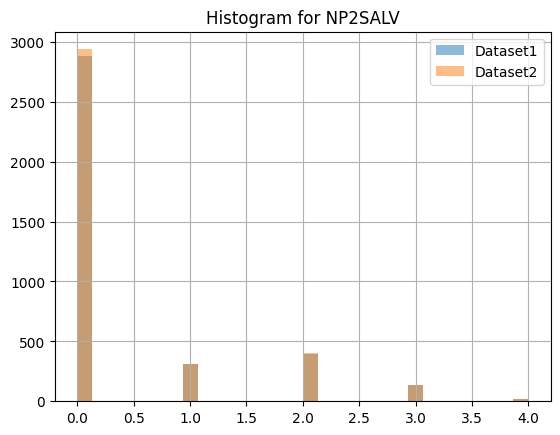

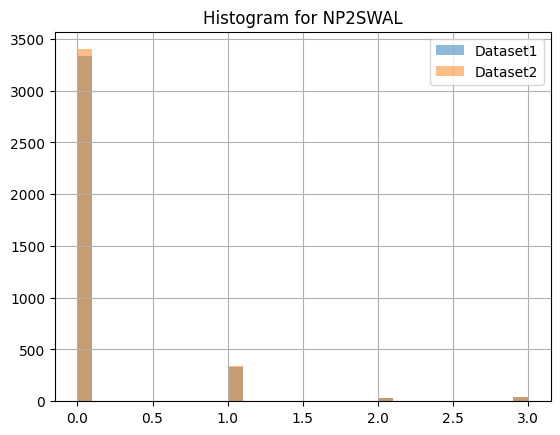

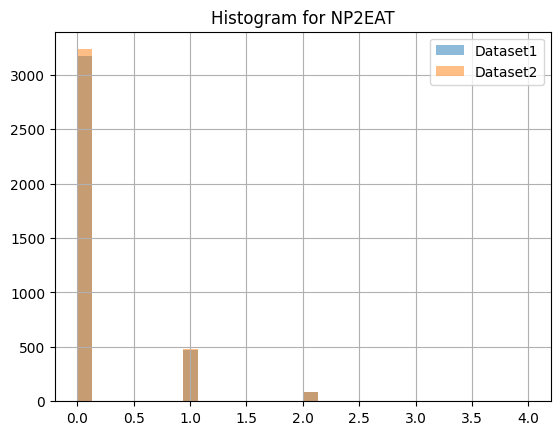

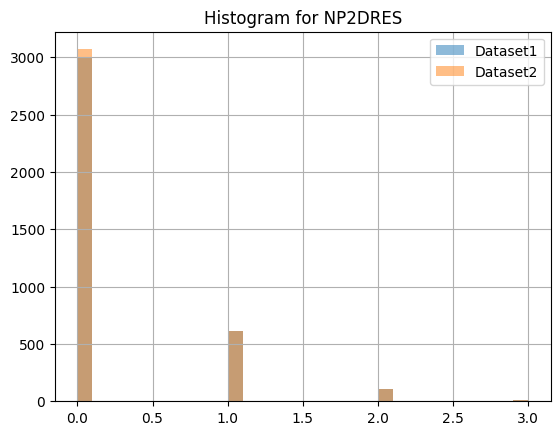

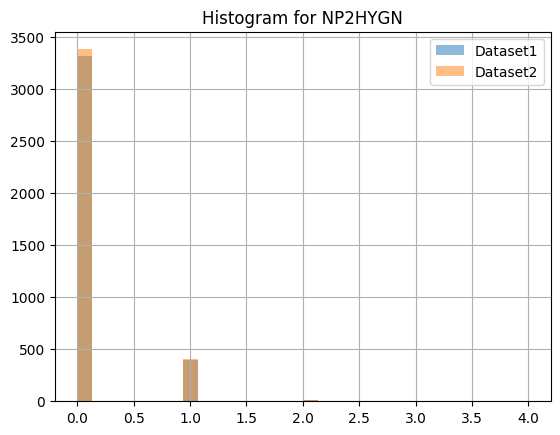

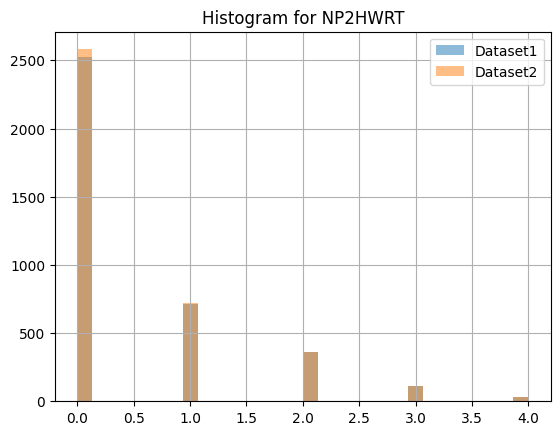

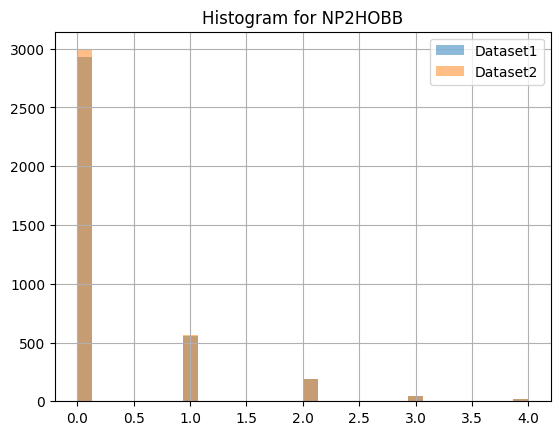

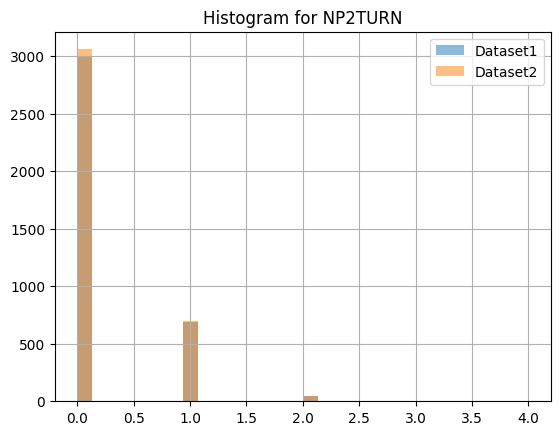

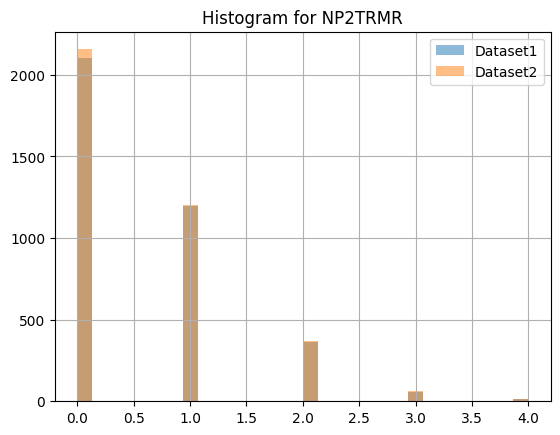

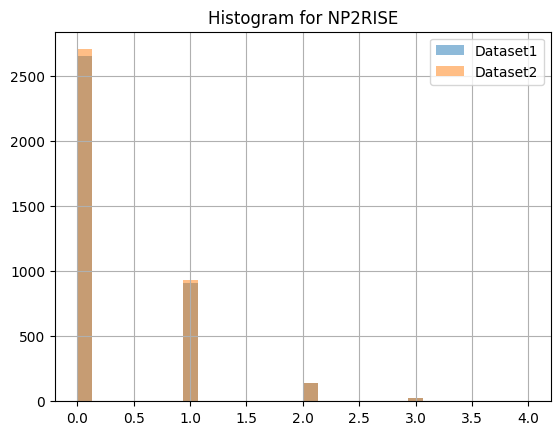

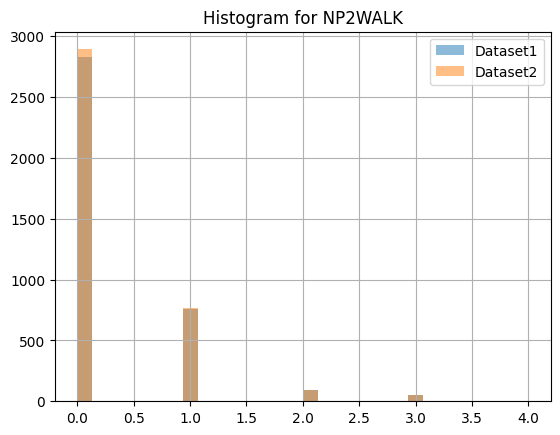

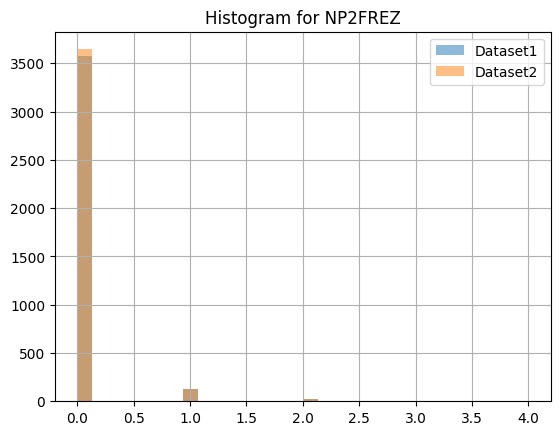

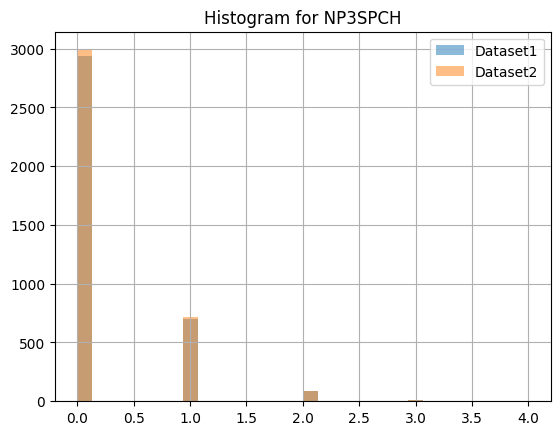

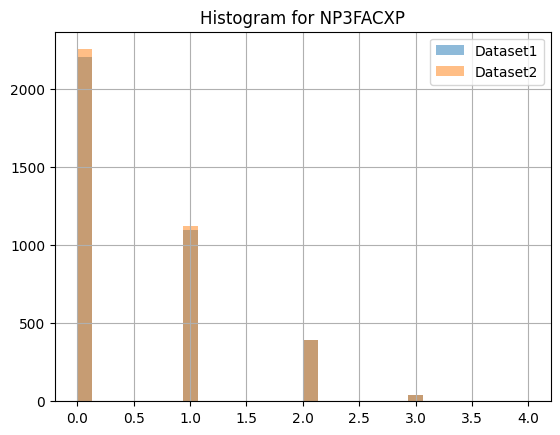

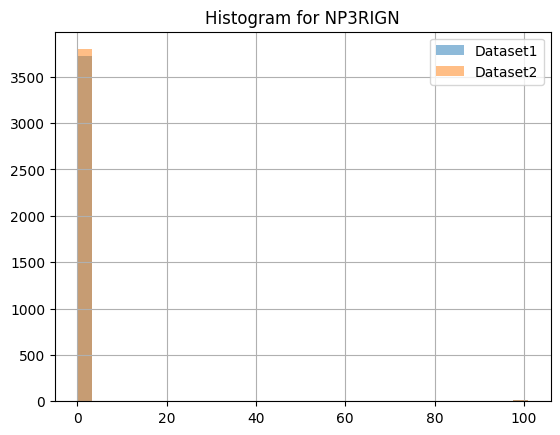

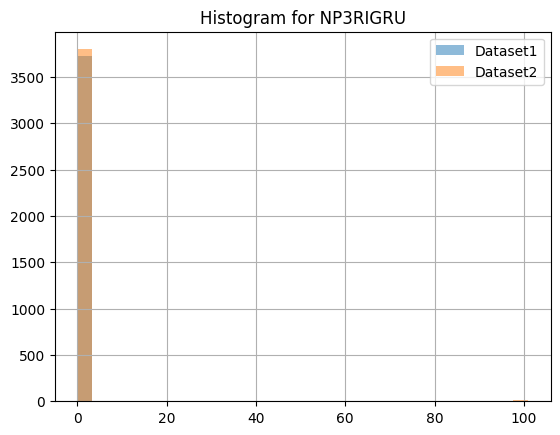

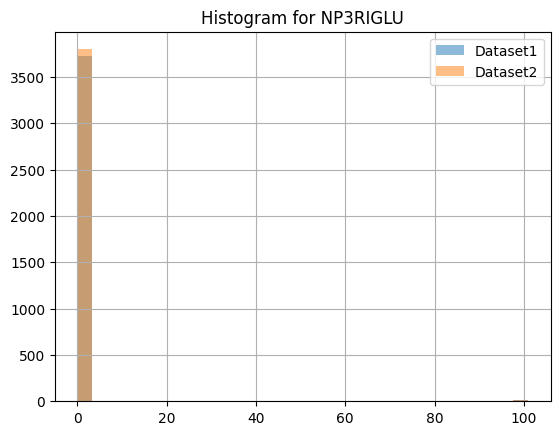

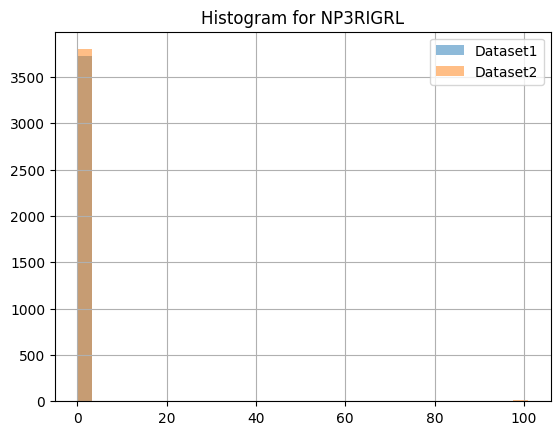

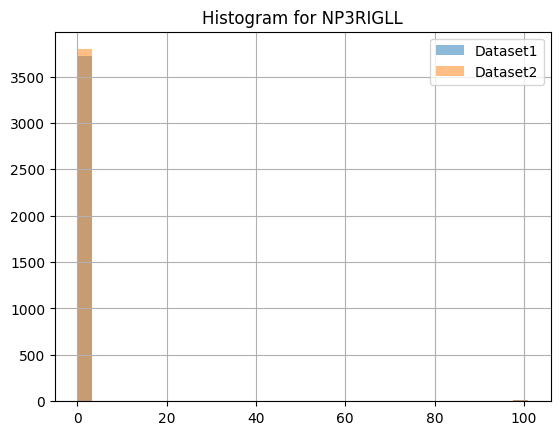

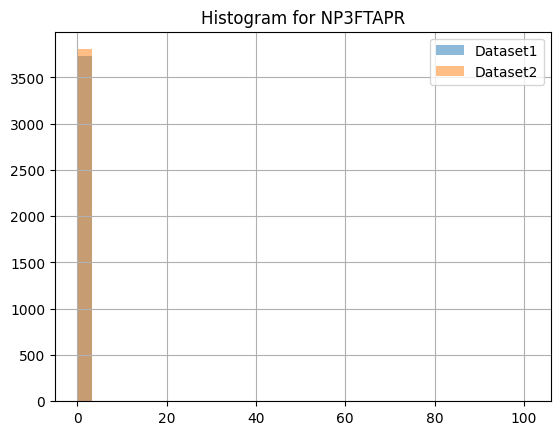

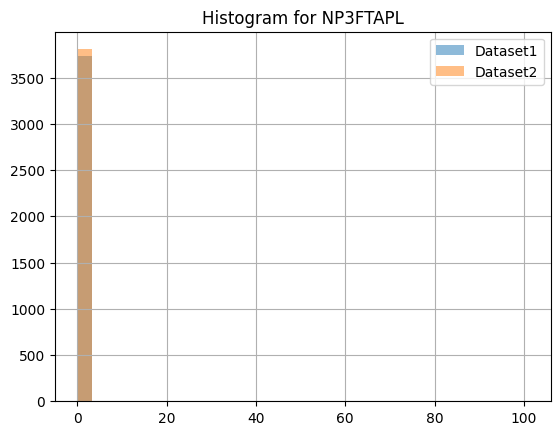

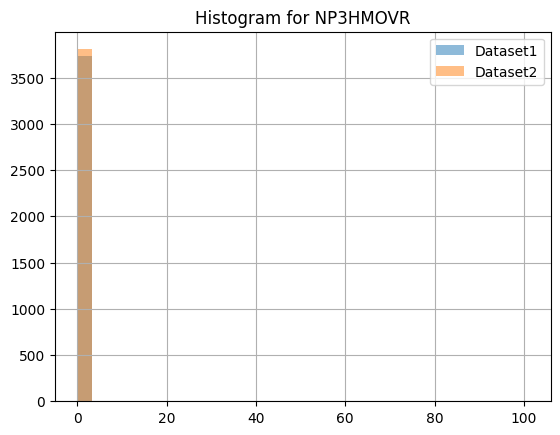

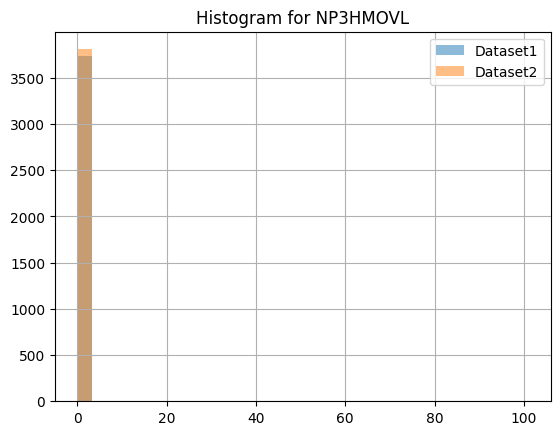

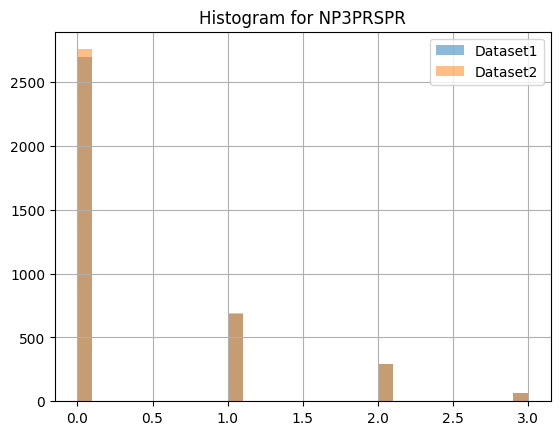

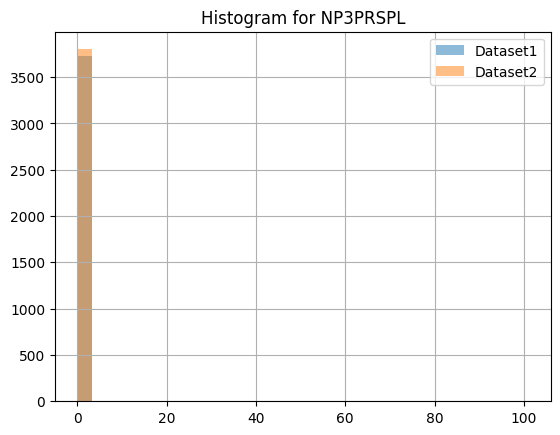

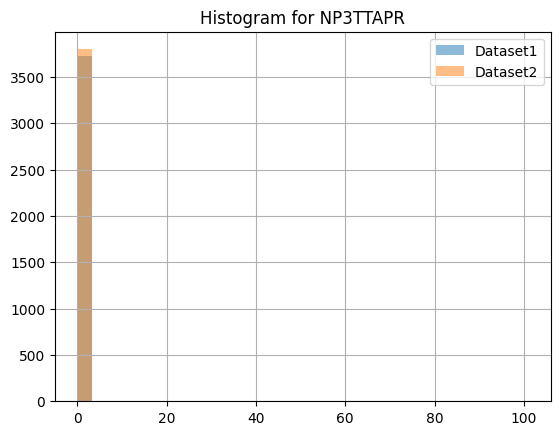

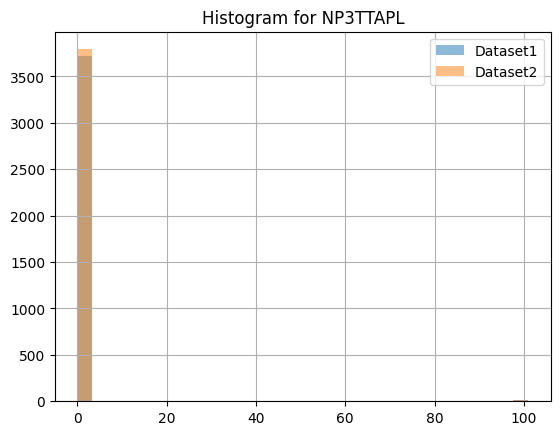

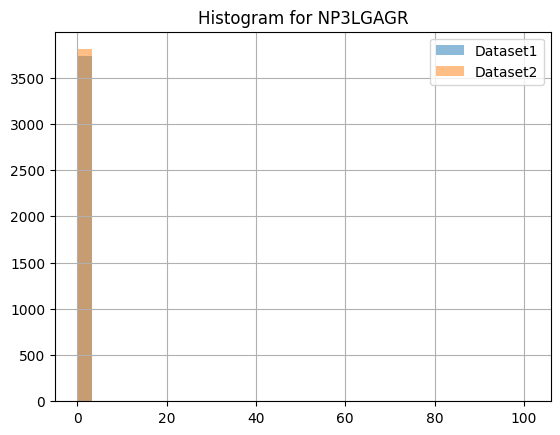

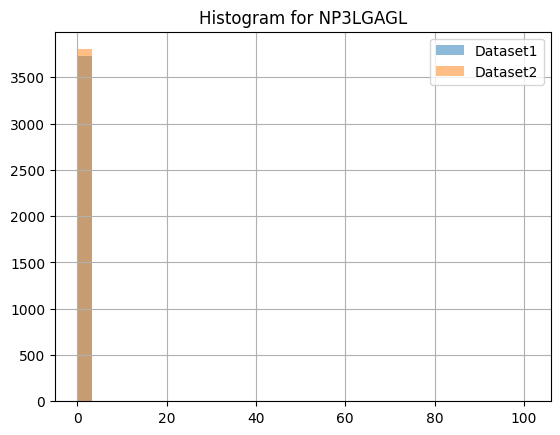

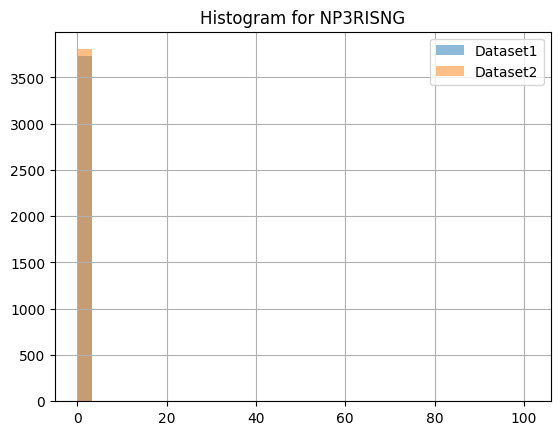

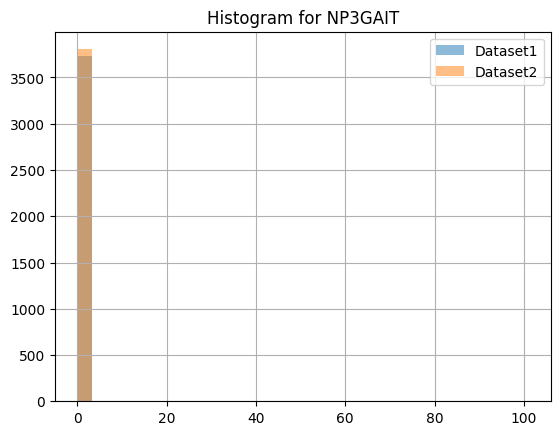

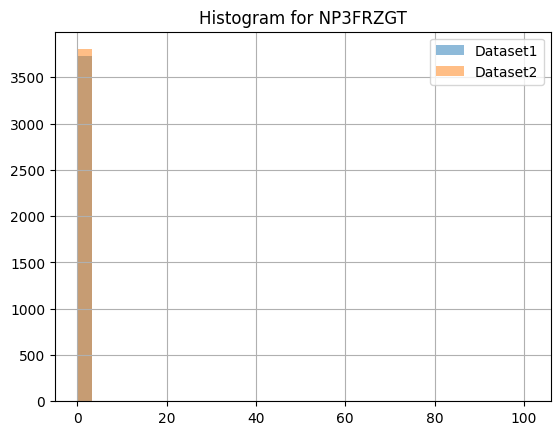

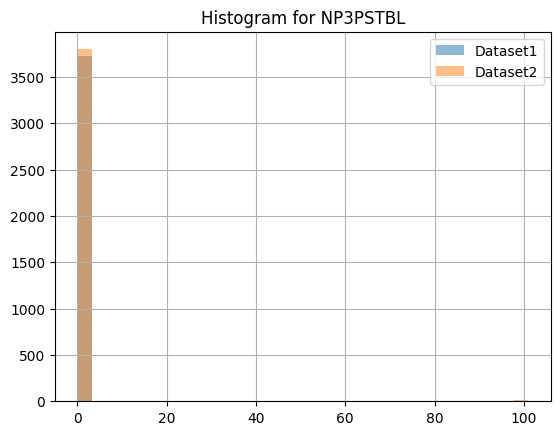

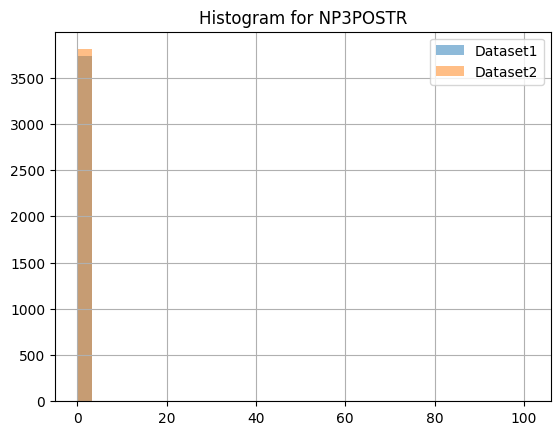

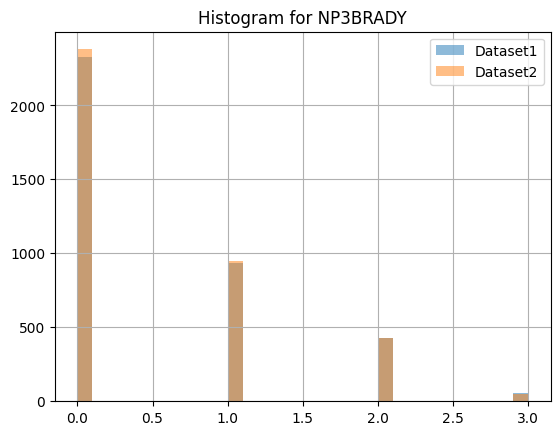

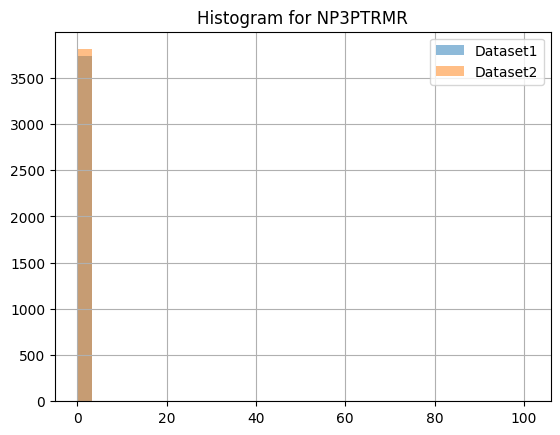

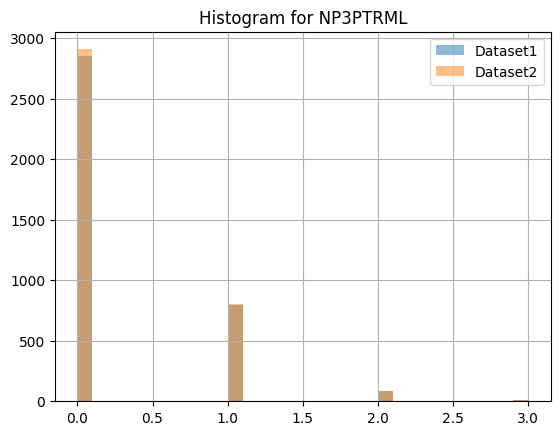

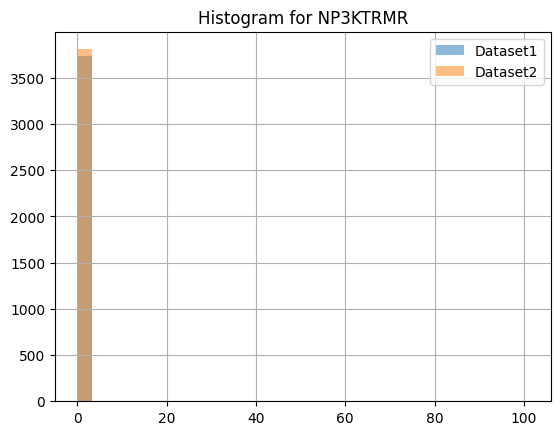

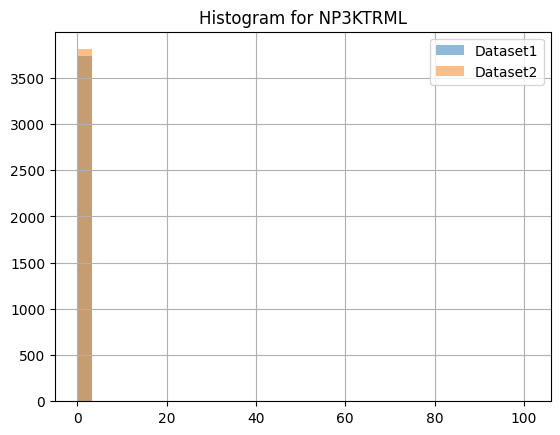

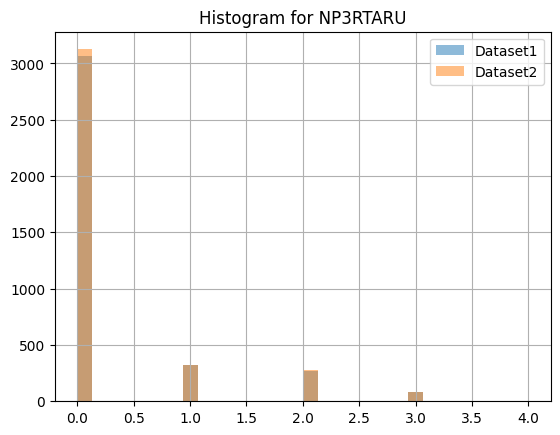

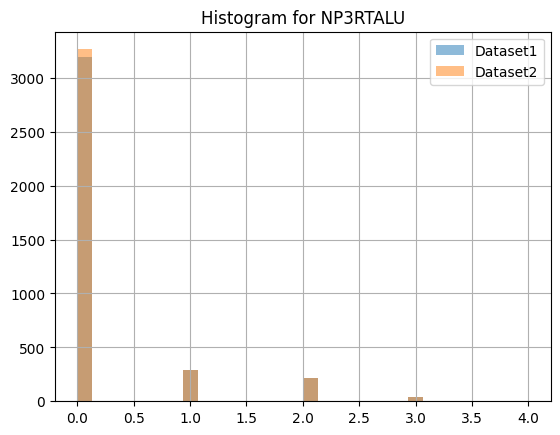

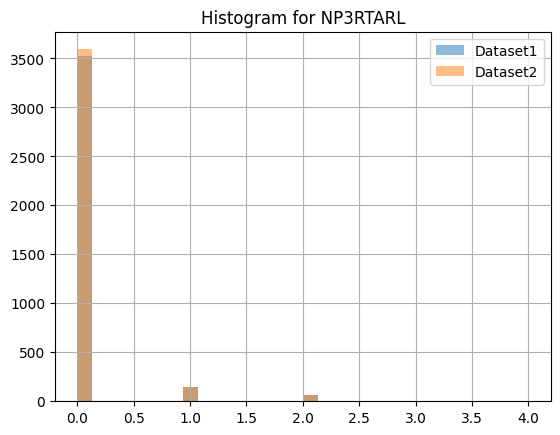

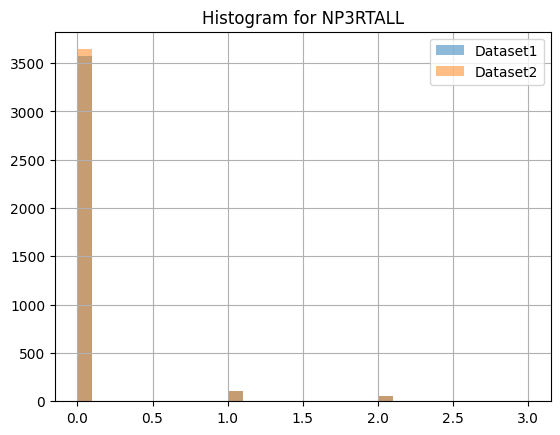

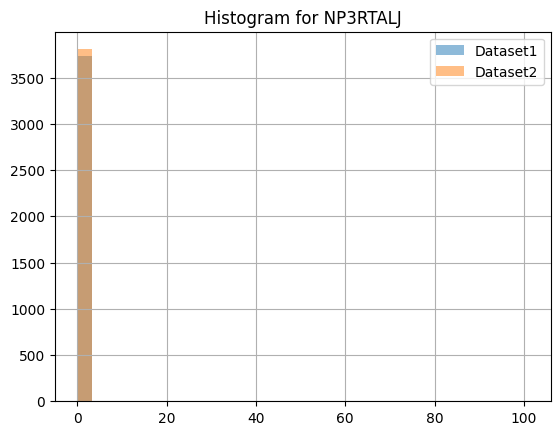

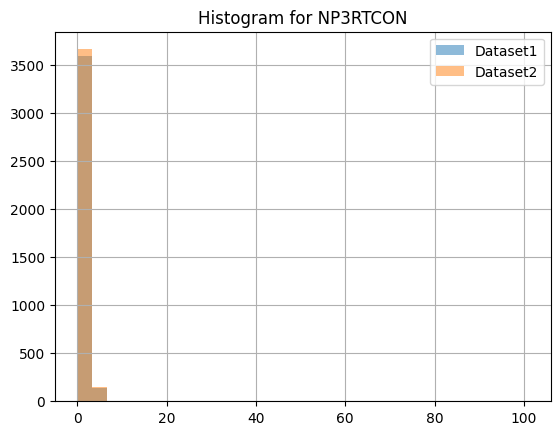

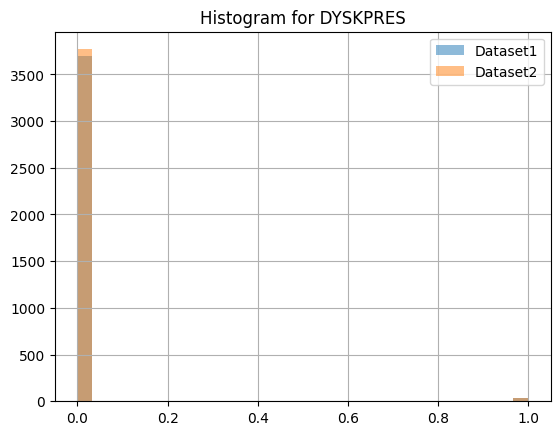

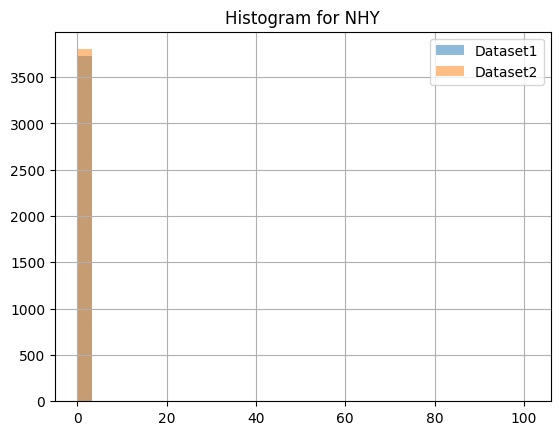

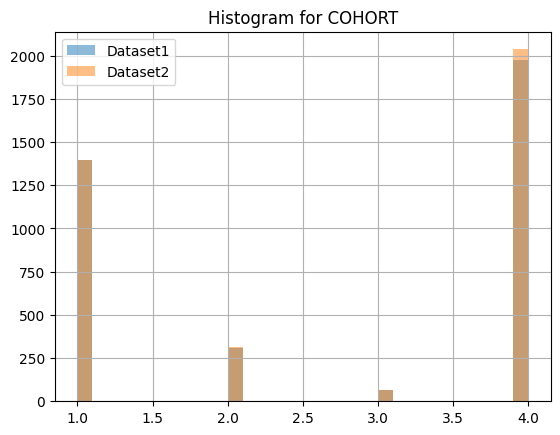

In [14]:
import matplotlib.pyplot as plt

for column in numerical_columns:
    plt.figure()
    data1[column].hist(alpha=0.5, label="Dataset1", bins=30)
    data2[column].hist(alpha=0.5, label="Dataset2", bins=30)
    plt.title(f"Histogram for {column}")
    plt.legend()
    plt.show()


In [15]:
for column in categorical_columns:
    plt.figure()
    pd.concat([data1[column].value_counts(normalize=True),
               data2[column].value_counts(normalize=True)],
              axis=1,
              keys=["Dataset1", "Dataset2"]
              ).plot(kind="bar")
    plt.title(f"Bar Chart for {column}")
    plt.show()
